In [2]:
import numpy as np
import sklearn, os
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

In [112]:
cifar_cls = ['bird', 'automobile', 'cat', 'deer', 'dog', 'frog', 'horse', 'airplane',  'ship', 'truck']

In [105]:
dataset = 'cifar'
a_pairs = "/Users/golf/code/Abnormal_result/Abnormal_result/{0}/1_pairs".format(dataset)
m_pairs = "/Users/golf/code/Abnormal_result/Abnormal_result/{0}/M_pairs".format(dataset)
m_n = "/Users/golf/code/Abnormal_result/Abnormal_result/{0}/M_N".format(dataset)
a_pairs_result = []
m_pairs_result = []
m_n_result = []

In [122]:
def read_csv_to_auc_mean(path, n=5):
    ret = [0]*10
    exps = glob(os.path.join(path, "*"))
#     classes = sorted(list(set([exp.split('/')[-1].split('_')[-2] for exp in exps])))
    for exp in exps:
        file_list = glob(os.path.join(exp, "test", "plots","mean*.csv"))
#         print(file_list)
        best_auc = 0
        for file in file_list:
            mean=pd.read_csv(file)
            mean_n=np.array(mean[mean.labels==0]['scores'])
            mean_ab=np.array(mean[mean.labels==1]['scores'])
            means = np.concatenate([mean_n, mean_ab])
            labels = np.concatenate([np.zeros_like(mean_n),np.ones_like(mean_ab)])
            best_auc = max(best_auc, roc_auc_score(labels, means))
#             print(best_auc)
        for i, cls in enumerate(cifar_cls):
            if cls == exp.split('/')[-1].split('_')[-2]:
                ret[i] = max(best_auc, ret[i])
    return ret

In [116]:
def read_csv_to_auprc_mean(path, n=5):
    ret = [0]*10
    exps = glob(os.path.join(path, "*"))
#     classes = sorted(list(set([exp.split('/')[-1].split('_')[-2] for exp in exps])))
    for exp in exps:
        file_list = glob(os.path.join(exp, "test", "plots","mean*.csv"))
#         print(file_list)
        best_auc = 0
        for file in file_list:
            mean=pd.read_csv(file)
            mean_n=np.array(mean[mean.labels==0]['scores'])
            mean_ab=np.array(mean[mean.labels==1]['scores'])
            means = np.concatenate([mean_n, mean_ab])
            labels = np.concatenate([np.zeros_like(mean_n),np.ones_like(mean_ab)])
            best_auc = max(best_auc, average_precision_score(labels, means))
        for i, cls in enumerate(cifar_cls):
            if cls == exp.split('/')[-1].split('_')[-2]:
                ret[i] += best_auc/n
    return ret

In [106]:
# proposed_result_mean = read_csv_to_auc_mean(proposed)
# baseline_result = read_csv_to_auc_mean(baselines)
a_pairs_result, cls = read_csv_to_auc_mean(a_pairs)
m_pairs_result, cls = read_csv_to_auc_mean(m_pairs)
m_n_result, cls = read_csv_to_auc_mean(m_n, n=4)

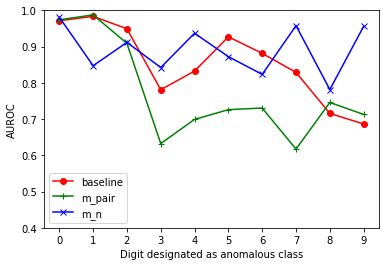

In [103]:
x = cls
plt.plot(x, a_pairs_result, 'ro-', label='baseline')
# plt.plot(x, proposed_result_var, 'b^--', label='proposed std')
plt.plot(x, m_pairs_result, 'g+-', label='m_pair')
# plt.plot(x, proposed_result_var, 'b^--', label='proposed std')
plt.plot(x, m_n_result, 'bx-', label='m_n')
plt.ylim(0.4,1)
plt.xlabel('Digit designated as anomalous class')
plt.ylabel('AUROC')
plt.legend()
# plt.title("Perfromance Comparison")
plt.savefig("comparison_auroc.png", dpi=300)

In [123]:
# proposed_result_mean = read_csv_to_auc_mean(proposed)
# baseline_result = read_csv_to_auc_mean(baselines)
a_pairs_result = read_csv_to_auc_mean(a_pairs)
m_pairs_result = read_csv_to_auc_mean(m_pairs)
m_n_result = read_csv_to_auc_mean(m_n)

In [126]:
bbl = [0.448,0.953, 0.607, 0.602, 0.615, 0.931, 0.788, 0.797, 0.659, 0.907]
ggl = [0.510, 0.631, 0.587, 0.593, 0.628, 0.683, 0.605, 0.633, 0.616, 0.617]

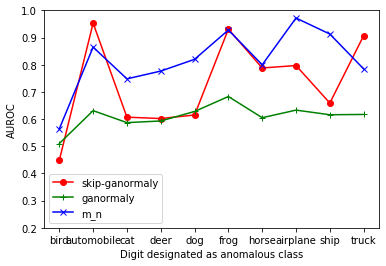

In [127]:
x = cifar_cls
plt.plot(x, bbl, 'ro-', label='skip-ganormaly')

plt.plot(x, ggl, 'g+-', label='ganormaly')
# plt.plot(x, a_pairs_result, 'ro-', label='baseline')
# plt.plot(x, proposed_result_var, 'b^--', label='proposed std')
# plt.plot(x, m_pairs_result, 'g+-', label='m_pair')
# plt.plot(x, proposed_result_var, 'b^--', label='proposed std')
plt.plot(x, m_n_result, 'bx-', label='m_n')
# plt.plot(x, m_n_result, 'bx-', label='m_n')
plt.ylim(0.2,1)
plt.xlabel('Digit designated as anomalous class')
plt.ylabel('AUROC')
plt.legend()
# plt.title("Perfromance Comparison")
plt.savefig("comparison_auroc.png", dpi=300)

In [88]:
a_pairs_result = read_csv_to_auprc_mean(a_pairs)
m_pairs_result = read_csv_to_auprc_mean(m_pairs)
m_n_result = read_csv_to_auprc_mean(m_n, n=4)

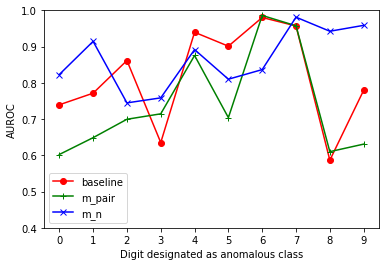

In [89]:
x = list(map(str,list(range(10))))
plt.plot(x, a_pairs_result, 'ro-', label='baseline')
plt.plot(x, m_pairs_result, 'g+-', label='m_pair')
plt.plot(x, m_n_result, 'bx-', label='m_n')
plt.ylim(0.4,1)
plt.xlabel('Digit designated as anomalous class')
plt.ylabel('AUROC')
plt.legend()
# plt.title("Perfromance Comparison")
plt.savefig("comparison_auroc.png", dpi=300)

In [85]:
a_pairs_result = read_csv_to_auprc_mean(a_pairs)
m_pairs_result = read_csv_to_auprc_mean(m_pairs)
m_n_result = read_csv_to_auprc_mean(m_n, n=5)

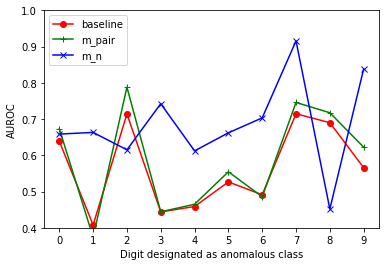

In [86]:
x = list(map(str,list(range(10))))
plt.plot(x, a_pairs_result, 'ro-', label='baseline')
plt.plot(x, m_pairs_result, 'g+-', label='m_pair')
plt.plot(x, m_n_result, 'bx-', label='m_n')
plt.ylim(0.4,1)
plt.xlabel('Digit designated as anomalous class')
plt.ylabel('AUROC')
plt.legend()
# plt.title("Perfromance Comparison")
plt.savefig("comparison_auroc.png", dpi=300)